In [1]:
# Step 1: Importing necessary libraries
import pandas as pd

# Step 2: Load dataset from the manually uploaded file (ensure the correct file name)
df = pd.read_csv('/kaggle/input/xAPI-Edu-Data/xAPI-Edu-Data.csv')  # Update this path if needed

# Step 3: Display the first 5 rows of the dataset
df.head()

# Step 4: Check the shape of the dataset (rows, columns)
print(f"Shape of dataset: {df.shape}")

# Step 5: Check column names
print(f"Columns: {df.columns}")

# Step 6: Get basic statistics of the data (e.g., counts, mean, std dev)
df.describe()


Shape of dataset: (480, 17)
Columns: Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


Missing values:
gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

Data types:
gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                  

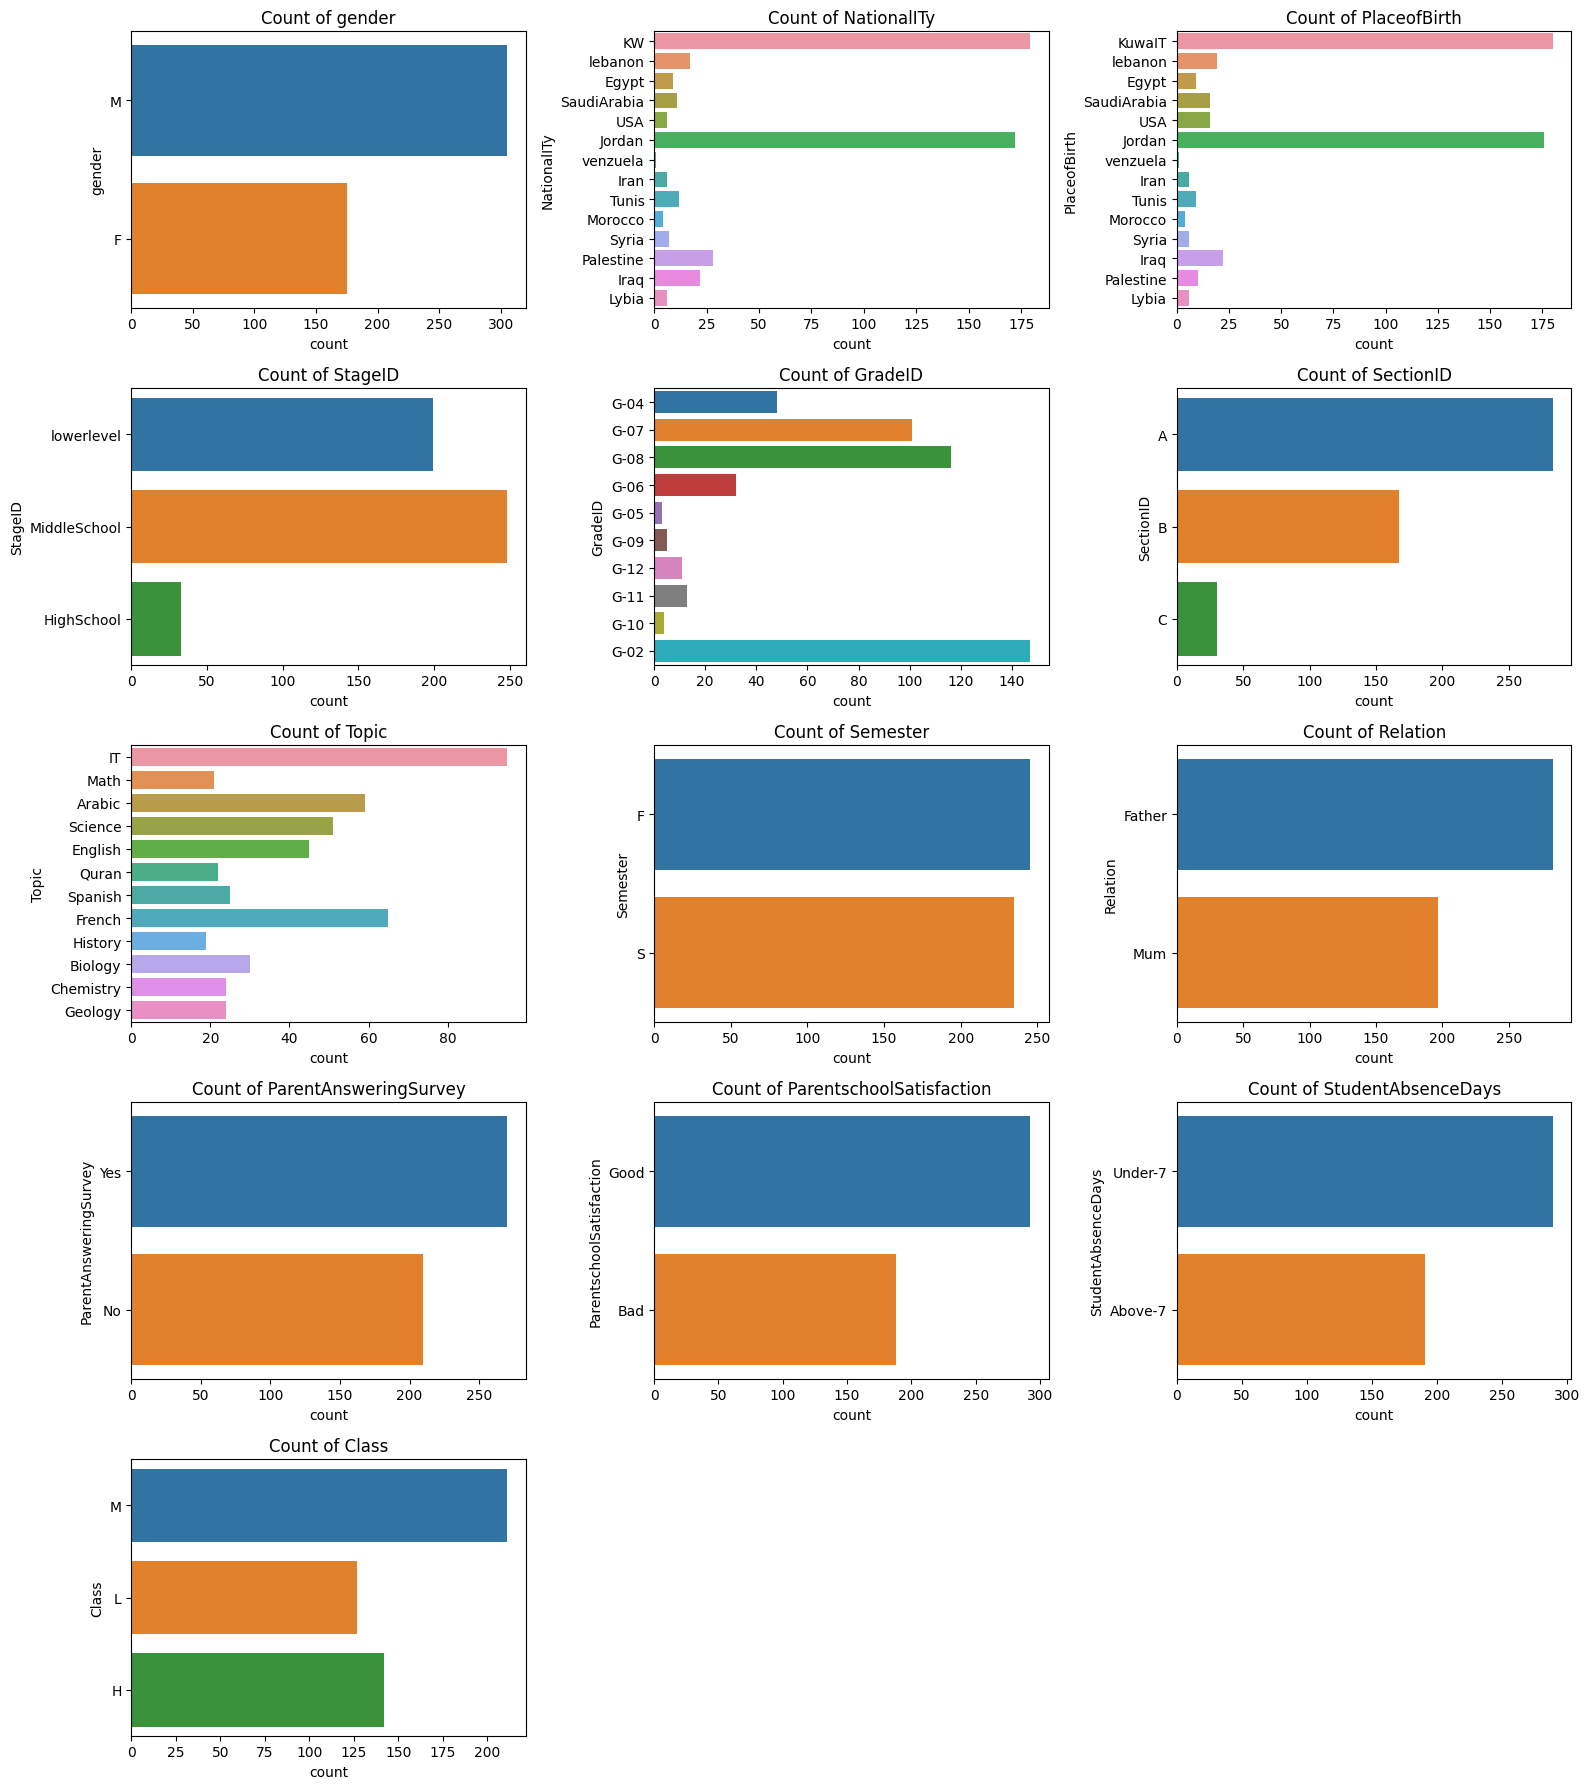

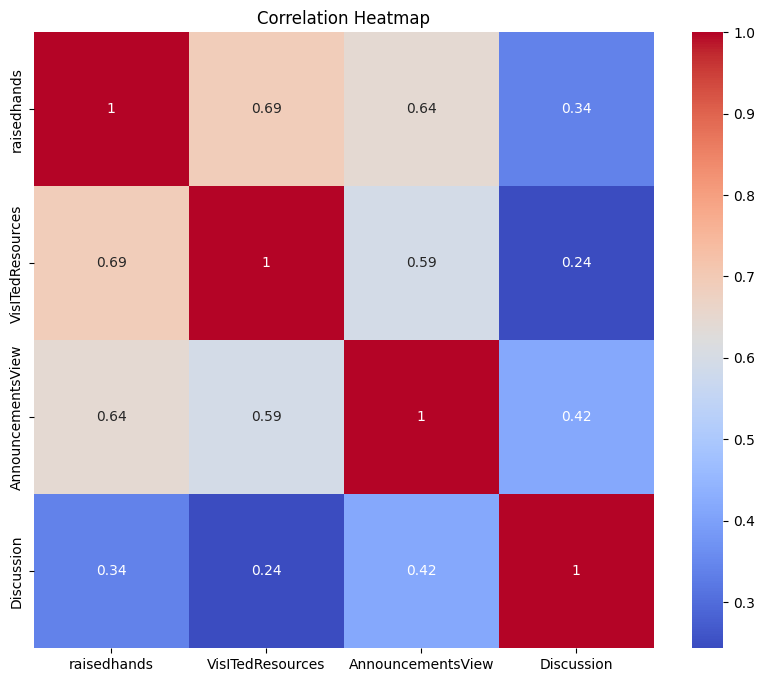

In [2]:
# Step 2: Exploratory Data Analysis (EDA)

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Check for missing values
print("Missing values:")
print(df.isnull().sum())
print()

# 2. View data types
print("Data types:")
print(df.dtypes)
print()

# 3. Visualize the count of unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(16, 18))  # bigger size for better layout
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 3, i)  # updated from (4, 3, i) to (5, 3, i)
    sns.countplot(y=df[col])
    plt.title(f'Count of {col}')
    plt.tight_layout()

plt.show()

# 4. Correlation heatmap for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Step 1: Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Step 2: Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the split
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 384
Testing samples: 96


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 2: Predict on test data
y_pred = model.predict(X_test)

# Step 3: Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.8541666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        22
           1       0.89      0.96      0.93        26
           2       0.87      0.83      0.85        48

    accuracy                           0.85        96
   macro avg       0.85      0.86      0.85        96
weighted avg       0.85      0.85      0.85        96


Confusion Matrix:
 [[17  0  5]
 [ 0 25  1]
 [ 5  3 40]]


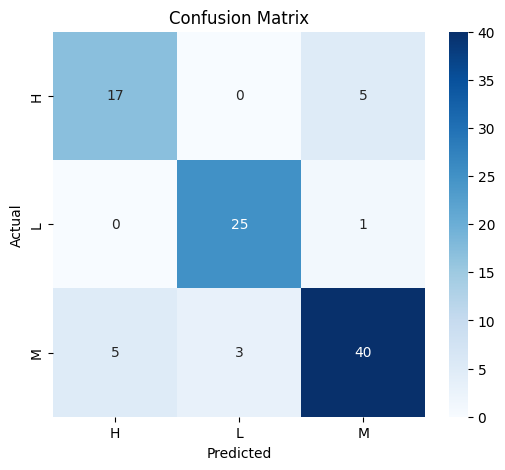

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Reuse predictions from previous step
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.inverse_transform([0,1,2]), yticklabels=le.inverse_transform([0,1,2]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [6]:
# Convert the array back to a DataFrame with the same column names
sample = pd.DataFrame([X_test.iloc[0].values], columns=X_test.columns)

# Make prediction without the warning
predicted_class = model.predict(sample)
print("Predicted Class:", le.inverse_transform(predicted_class)[0])


Predicted Class: M


## ✅ Project Conclusion:

This project successfully built a machine learning model to classify students into academic performance categories (Low, Mid, High). With an accuracy of ~85%, this model can help educators:

- Detect struggling students early
- Tailor support based on performance
- Enhance classroom strategies

Further improvements can be made by:
- Using ensemble methods like Random Forest
- Applying hyperparameter tuning
- Collecting more diverse student data
